# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

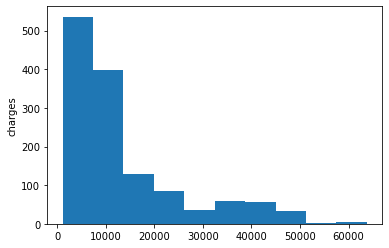

In [8]:
plt.hist(medical['charges'],bins=10)
plt.ylabel('charges')
plt.show()

In [9]:
mean_charges=np.mean(medical['charges'])
std_charges=np.std(medical['charges'])
print('Mean of charges= ',mean_charges,'Std of charges= ',std_charges)

Mean of charges=  13270.422265141257 Std of charges=  12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
The data provided represents a random sample of charges, which allows for making inferences about the population. To determine if the actual average charge has fallen below 12,000, a suitable frequentist test to apply would be a one-sample t-test. This test compares the sample mean to a hypothesized population mean and assesses if there is enough evidence to suggest a significant difference.

By conducting the one-sample t-test and comparing the calculated t-statistic with the critical value, you can determine if the null hypothesis, which assumes the average charge is equal to or greater than 12,000, should be rejected. The choice of significance level (alpha) helps determine the threshold for rejecting the null hypothesis.

Performing this test will provide insights into whether the actual average charge has fallen below 12,000, addressing the concerns of the administrator regarding the hospital's operational model.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

Since the concern is specifically about the average charge being below a certain threshold, such as 12,000, then a one-sided confidence interval would be appropriate.

A one-sided confidence interval focuses on estimating the lower or upper bound of the parameter of interest, depending on the specific concern. In this case, the administrator is concerned about the average charge falling below 12,000, suggesting a one-sided interval for estimating the lower bound.

__A:__

In [11]:
import pandas as pd
import scipy.stats as stats

# Create a DataFrame with the given dataset
data = pd.DataFrame({
    'charges': [16884.92400, 1725.55230, 4449.46200, 21984.47061, 3866.85520]
})

# Extract the charges column
charges = data['charges']

# Calculate sample mean and sample standard deviation
sample_mean = charges.mean()
sample_std = charges.std(ddof=1)

# Determine the degrees of freedom
degrees_of_freedom = len(charges) - 1

# Choose significance level (alpha)
alpha = 0.05

# Calculate critical value from t-distribution
critical_value = stats.t.ppf(1 - alpha, df=degrees_of_freedom)

# Calculate margin of error
margin_of_error = critical_value * (sample_std / (len(charges) ** 0.5))

# Calculate lower bound of one-sided confidence interval
confidence_interval_lower = sample_mean - margin_of_error

print("Critical value:", critical_value)
print("Lower bound of the one-sided 95% confidence interval:", confidence_interval_lower)

Critical value: 2.13184678133629
Lower bound of the one-sided 95% confidence interval: 1153.1033798829812


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

For the t-test for the difference between means assuming equal variances:

* The null hypothesis (H0) states that the means of the two groups are equal.

* The alternative hypothesis (Ha) states that the means of the two groups are not equal.

* We make the assumption of equal variances, assuming that the variability or spread of the data in the two groups is similar.

* The pooled standard deviation (sp) is calculated by combining the sample variances from both groups, weighted by their respective degrees of freedom.

* The t-test statistic is then calculated using the pooled standard deviation, the difference between the sample means, and the sample sizes.

* If the assumption of equal variances is violated, alternative methods such as Welch's t-test can be used.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [12]:
# 1/ Manual approach:
import numpy as np
from scipy.stats import t

# Define the two independent samples (replace with your actual data)
sample1 = np.array([19, 18, 28, 33, 32])
sample2 = np.array([0, 1, 1, 1, 1])

# Calculate the sample means and sample standard deviations
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
std1 = np.std(sample1, ddof=1)
std2 = np.std(sample2, ddof=1)

# Calculate the pooled standard deviation
n1 = len(sample1)
n2 = len(sample2)
df = n1 + n2 - 2
sp = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / df)

# Calculate the test statistic
t_stat = (mean1 - mean2) / (sp * np.sqrt(1 / n1 + 1 / n2))

# Calculate the p-value (two-tailed)
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print("Manual approach:")
print("Test statistic:", t_stat)
print("p-value:", p_value)

Manual approach:
Test statistic: 7.91373609206873
p-value: 4.720873268482251e-05


In [13]:
# 2/ Using scipy.stats function:
from scipy.stats import ttest_ind

# Perform the independent t-test using scipy.stats
t_stat, p_value = ttest_ind(sample1, sample2)

print("\nUsing scipy.stats:")
print("Test statistic:", t_stat)
print("p-value:", p_value)


Using scipy.stats:
Test statistic: 7.913736092068729
p-value: 4.7208732684984846e-05


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

In summary, while there is no direct equivalent function for performing a z-test from a sample in scipy.stats, the library provides several useful functions for statistical testing. These include zscore, which calculates z_-_scores for a given sample, and norm, which offers methods related to the normal (Gaussian) distribution.

Scipy.stats also provides functions like binom_test for performing binomial tests to compare sample proportions to known population proportions. Although there is no specific function dedicated solely to conducting a z-test on a sample, you can calculate the z-score manually using zscore and utilize the functionality of norm to calculate p-values or perform hypothesis tests.

Overall, scipy.stats offers a wide range of functions for conducting various statistical tests, enabling researchers and practitioners to analyze and interpret data effectively.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test